In [28]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [30]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [31]:
match1 = df2[(df2['team1'] == 'Rajasthan Royals') & (df2['team2'] == 'Kolkata Knight Riders')]
match2 = df2[(df2['team1'] == 'Kolkata Knight Riders') & (df2['team2'] == 'Rajasthan Royals')]

Match1 = Rajasthan Home Ground

Match2 = Kolkata Home Ground

# Overall Kolkata vs Rajasthan:

In [32]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date             team1  \
77    78    2008     Jaipur  2008-05-01  Rajasthan Royals   
125  126    2009  Cape Town  2009-04-23  Rajasthan Royals   
167  168    2009     Durban  2009-05-20  Rajasthan Royals   
186  187    2010  Ahmedabad  2010-03-20  Rajasthan Royals   
226  227    2010    Kolkata  2010-04-17  Rajasthan Royals   

                     team2            toss_winner toss_decision  result  \
77   Kolkata Knight Riders       Rajasthan Royals           bat  normal   
125  Kolkata Knight Riders  Kolkata Knight Riders         field     tie   
167  Kolkata Knight Riders  Kolkata Knight Riders         field  normal   
186  Kolkata Knight Riders       Rajasthan Royals           bat  normal   
226  Kolkata Knight Riders       Rajasthan Royals           bat  normal   

     dl_applied                 winner  win_by_runs  win_by_wickets  \
77            0       Rajasthan Royals           45               0   
125           0       Rajasthan Royals            0               0   
167           0  Kolkata Knight Riders            0               4   
186           0       Rajasthan Royals           34               0   
226           0  Kolkata Knight Riders            0               8   

     player_of_match                         venue      umpire1  \
77       SA Asnodkar        Sawai Mansingh Stadium  RE Koertzen   
125        YK Pathan                      Newlands    MR Benson   
167        LR Shukla                     Kingsmead   BG Jerling   
186  AA Jhunjhunwala  Sardar Patel Stadium, Motera  RE Koertzen   
226       JD Unadkat                  Eden Gardens   BG Jerling   

            umpire2 umpire3  
77   GA Pratapkumar     NaN  
125       M Erasmus     NaN  
167      SJA Taufel     NaN  
186       RB Tiffin     NaN  
226       RB Tiffin     NaN

Matches played between Kolkata and Rajasthan.

In [33]:
match.shape

(20, 18)

In [34]:
match['winner'].value_counts()

Kolkata Knight Riders    10
Rajasthan Royals         10
Name: winner, dtype: int64

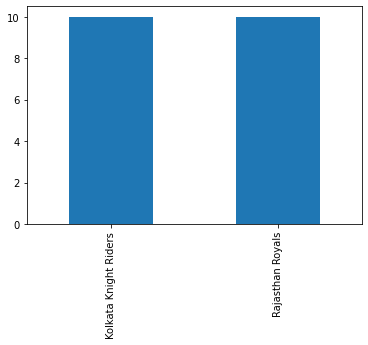

In [35]:
match['winner'].value_counts().plot.bar()
plt.show()

Kolkata and Rajasthan both won 10 times against each other.

In [36]:
match['toss_winner'].value_counts()

Kolkata Knight Riders    10
Rajasthan Royals         10
Name: toss_winner, dtype: int64

In [37]:
match['toss_decision'].value_counts()

field    13
bat       7
Name: toss_decision, dtype: int64

In [38]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Kolkata Knight Riders    6
Rajasthan Royals         6
Name: winner, dtype: int64

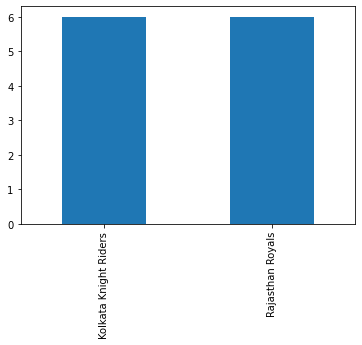

In [39]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Both won the toss and won the match 6 times. So winning toss doesn't have much affect to winning the match.

In [40]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning      batting_team           bowling_team  over  ball  \
18123        78       1  Rajasthan Royals  Kolkata Knight Riders     1     1   
18124        78       1  Rajasthan Royals  Kolkata Knight Riders     1     2   
18125        78       1  Rajasthan Royals  Kolkata Knight Riders     1     3   
18126        78       1  Rajasthan Royals  Kolkata Knight Riders     1     4   
18127        78       1  Rajasthan Royals  Kolkata Knight Riders     1     5   

           batsman  non_striker    bowler  is_super_over  ...  bye_runs  \
18123     GC Smith  SA Asnodkar  AB Dinda              0  ...         0   
18124     GC Smith  SA Asnodkar  AB Dinda              0  ...         0   
18125     GC Smith  SA Asnodkar  AB Dinda              0  ...         0   
18126  SA Asnodkar     GC Smith  AB Dinda              0  ...         0   
18127  SA Asnodkar     GC Smith  AB Dinda              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
18123            0            0             0             0           0   
18124            0            0             0             0           0   
18125            0            0             0             1           0   
18126            0            0             0             4           0   
18127            0            0             0             0           0   

       total_runs  player_dismissed dismissal_kind fielder  
18123           0               NaN            NaN     NaN  
18124           0               NaN            NaN     NaN  
18125           1               NaN            NaN     NaN  
18126           4               NaN            NaN     NaN  
18127           0               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Kolkata and Rajasthan.

In [41]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many wickets will fall in totall during the match:

In [42]:
total_wickets_fallen = delivery['player_dismissed'].count()
total_wickets_fallen

244

Total 244 wickets fallen in Kolkata vs Rajasthan match till now.

In [43]:
avg_wicket_fallen = math.ceil(total_wickets_fallen/len(ids))
avg_wicket_fallen

13

13 wickets in an average fallen in Kolkata vs Rajasthan match till now.

In [44]:
total_matches_Kolkata_batting_first_Rajasthan_batting_second = list(delivery[(delivery['inning'] == 1) & (delivery['batting_team'] == 'Kolkata Knight Riders')]['match_id'].unique())
len(total_matches_Kolkata_batting_first_Rajasthan_batting_second)

3

Kolkata batted in first innings in 3 matches against Rajasthan.

In [45]:
total_wickets_fallen_Kolkata_batting_first_Rajasthan_batting_second = 0
for i in total_matches_Kolkata_batting_first_Rajasthan_batting_second:
    total_wickets_fallen_Kolkata_batting_first_Rajasthan_batting_second += delivery[(delivery['match_id'] == i)]['player_dismissed'].count()
total_wickets_fallen_Kolkata_batting_first_Rajasthan_batting_second

36

Total 36 wickets fallen when Kolkata batted in first inning and Rajasthan batted in second inning.

In [46]:
avg_wickets_fallen_Kolkata_batting_first_Rajasthan_batting_second = total_wickets_fallen_Kolkata_batting_first_Rajasthan_batting_second/len(total_matches_Kolkata_batting_first_Rajasthan_batting_second)
avg_wickets_fallen_Kolkata_batting_first_Rajasthan_batting_second

12.0

12 wickets in an average fallen per match when Kolkata batted in first inning and Rajasthan batted in second inning.

In [47]:
total_matches_Rajasthan_batting_first_Kolkata_batting_second = list(delivery[(delivery['inning'] == 2) & (delivery['batting_team'] == 'Kolkata Knight Riders')]['match_id'].unique())
len(total_matches_Rajasthan_batting_first_Kolkata_batting_second)

17

Kolkata batted in second innings in 17 matches against Rajasthan.

In [48]:
total_wickets_fallen_Rajasthan_batting_first_Kolkata_batting_second = 0
for i in total_matches_Rajasthan_batting_first_Kolkata_batting_second:
    total_wickets_fallen_Rajasthan_batting_first_Kolkata_batting_second += delivery[(delivery['match_id'] == i)]['player_dismissed'].count()
total_wickets_fallen_Rajasthan_batting_first_Kolkata_batting_second

208

Total 208 wickets fallen when Rajsthan batted in first inning and Kolkata batted in second inning.

In [49]:
avg_wickets_fallen_Rajasthan_batting_first_Kolkata_batting_second = total_wickets_fallen_Rajasthan_batting_first_Kolkata_batting_second/len(total_matches_Rajasthan_batting_first_Kolkata_batting_second)
avg_wickets_fallen_Rajasthan_batting_first_Kolkata_batting_second

12.235294117647058

12 wickets in an average fallen per match when Rajasthan batted in first inning and Kolkata batted in second inning.

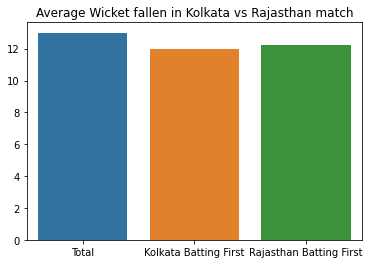

In [50]:
avg_wickets_per_match = pd.Series([avg_wicket_fallen,avg_wickets_fallen_Kolkata_batting_first_Rajasthan_batting_second,avg_wickets_fallen_Rajasthan_batting_first_Kolkata_batting_second],index=['Total','Kolkata Batting First','Rajasthan Batting First'])
sns.barplot(x=avg_wickets_per_match.index,y=avg_wickets_per_match)
plt.title('Average Wicket fallen in Kolkata vs Rajasthan match')
plt.show()

**So 12 more/less wickets fallen in Kolkata vs Rajsthan match till now in overall IPL.**

## Which batsman will have the highest (number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio in the match:

In [51]:
batsman = ['SP Narine', 'EJG Morgan', 'AD Russell', 'N Rana', 'KD Karthik', 'S Gill', 'R Singh', 'R Parag', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler', 'J Archer', 'S Gopal', 'R Tewatia']
ratio_dict = {}
for j in batsman:
    ratio_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        ratio = 999
        for i in batsman_runs:
            if i >= 4:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        if len(batsman_runs) >= 10:
            ratio = (boundary_run - without_boundary_run)/total_run
        else:
            ratio = 999
        if ratio != 999:
            ratio_list.append(ratio)
    if len(ratio_list) != 0:
        ratio_dict[j] = ratio_list
for k,v in ratio_dict.items():
    ratio_dict[k] = np.round(np.mean(v),2)
ratio_dict

{'SP Narine': 0.53,
 'EJG Morgan': 0.18,
 'AD Russell': 0.33,
 'N Rana': 0.09,
 'KD Karthik': 0.22,
 'S Gill': 0.05,
 'R Parag': 0.28,
 'BA Stokes': -0.42,
 'SPD Smith': -0.11,
 'SV Samson': 0.1,
 'JC Buttler': 0.17,
 'J Archer': 0.43}

These are the ratios of batsmen in Kolkata vs Rajasthan match.

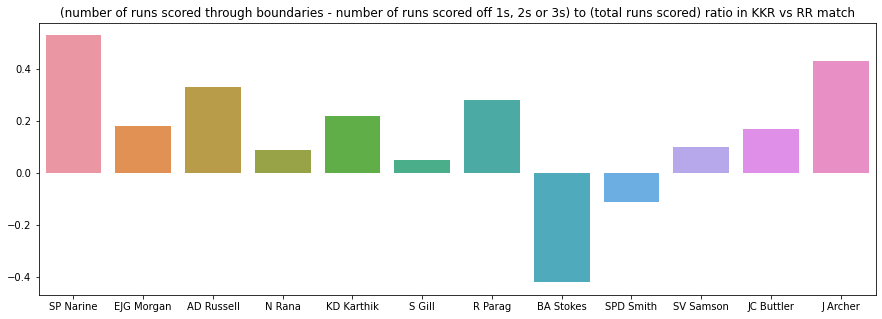

In [52]:
ratio = pd.Series(list(ratio_dict.values()),index = list(ratio_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = ratio.index, y = ratio,ax=ax)
plt.title('(number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio in KKR vs RR match')
plt.show()

**So SP Narine has the highest (number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio in KKR vs RR match followed by J Archer.**

In [53]:
batsman_overall = ['SP Narine', 'EJG Morgan', 'AD Russell', 'N Rana', 'KD Karthik', 'S Gill', 'R Singh', 'RA Tripathi','M Vohra', 'R Parag', 'RV Uthappa', 'T Curran', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler', 'J Archer', 'S Gopal', 'R Tewatia']
ratio_dict_overall = {}
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    ratio_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        ratio = 999
        for i in batsman_runs:
            if i >= 4:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        if len(batsman_runs) >= 10:
            ratio = (boundary_run - without_boundary_run)/total_run
        else:
            ratio = 999
        if ratio != 999:
            ratio_list.append(ratio)
    if len(ratio_list) != 0:
        ratio_dict_overall[j] = ratio_list
for k,v in ratio_dict_overall.items():
    ratio_dict_overall[k] = np.round(np.mean(v),2)
ratio_dict_overall

{'SP Narine': 0.6,
 'EJG Morgan': -0.02,
 'AD Russell': 0.51,
 'N Rana': 0.24,
 'KD Karthik': 0.03,
 'S Gill': -0.14,
 'R Singh': 0.12,
 'RA Tripathi': 0.18,
 'M Vohra': 0.16,
 'R Parag': 0.12,
 'RV Uthappa': 0.15,
 'T Curran': 0.33,
 'BA Stokes': -0.13,
 'SPD Smith': -0.1,
 'SV Samson': 0.04,
 'JC Buttler': 0.27,
 'J Archer': 0.13,
 'S Gopal': -0.59,
 'R Tewatia': -0.27}

These are the ratios of Kolkata and Rajasthan batsmen in overall IPL.

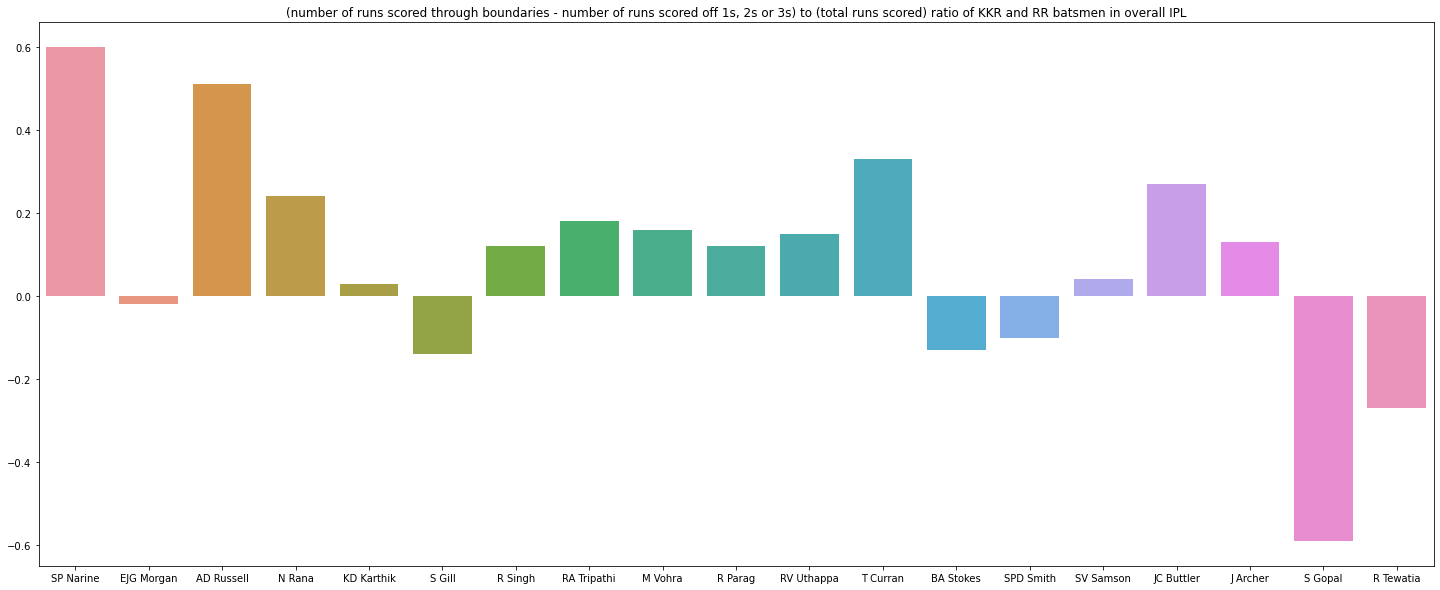

In [63]:
ratio_overall = pd.Series(list(ratio_dict_overall.values()),index = list(ratio_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x = ratio_overall.index, y = ratio_overall,ax=ax)
plt.title('(number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio of KKR and RR batsmen in overall IPL')
plt.show()

**SP Narine  has the highest (number of runs scored through boundaries - number of runs scored off 1s, 2s or 3s) to (total runs scored) ratio among current batsmen of Kolkata and Rajasthan in overall IPL followed by AD Russell.**

## Which will be Jofra Archer's Economy Rate and how many boundaries will he give away in his four overs:

In [55]:
economy_rate_list = []
boundary_list = []
for k in ids:
    runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'J Archer')]['total_runs'])
    batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'J Archer')]['batsman_runs'])
    bye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'J Archer')]['bye_runs'])
    legbye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'J Archer')]['legbye_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'J Archer')]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == 'J Archer')]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    boundary_count = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if batsman_runs[i] >= 4:
            boundary_count += 1
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls = len(runs) - noball - wideball
    total_runs = s - bye - legbye
    if total_balls > 6:
        economy_rate = (total_runs/total_balls)*6
    else:
        economy_rate = 0
    if economy_rate > 0:
        economy_rate_list.append(economy_rate)
        boundary_list.append(boundary_count)
print('The Economy rates of Jofra Archer against Kolkata are',economy_rate_list)
print('The number of Boundaries given away by Jofra Archer against Kolkata are',boundary_list)
print('The average economy rate of Jofra Archer against Kolkata is', np.mean(economy_rate_list))
print('The average Boundaries given away by Jofra Archer against Kolkata is', np.mean(boundary_list))

The Economy rates of Jofra Archer against Kolkata are [10.75, 5.0, 9.25, 7.25]
The number of Boundaries given away by Jofra Archer against Kolkata are [8, 2, 4, 3]
The average economy rate of Jofra Archer against Kolkata is 8.0625
The average Boundaries given away by Jofra Archer against Kolkata is 4.25


So Jofra Archer's average economy rate against Kolkata is 8.06 and average Boundaries given away is 4.

In [56]:
economy_rate_list_overall = []
boundary_list_overall = []
total_ids = list(df1[df1['bowler'] == 'J Archer']['match_id'].unique())
for k in total_ids:
    runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'J Archer')]['total_runs'])
    batsman_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'J Archer')]['batsman_runs'])
    bye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'J Archer')]['bye_runs'])
    legbye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'J Archer')]['legbye_runs'])
    wide_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'J Archer')]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == 'J Archer')]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    boundary_count = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if batsman_runs[i] >= 4:
            boundary_count += 1
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls = len(runs) - noball - wideball
    total_runs = s - bye - legbye
    if total_balls > 6:
        economy_rate = (total_runs/total_balls)*6
    else:
        economy_rate = 0
    if economy_rate > 0:
        economy_rate_list_overall.append(economy_rate)
        boundary_list_overall.append(boundary_count)
print('The Economy rates of Jofra Archer in overall IPL are\n',economy_rate_list_overall)
print('The number of Boundaries given away by Jofra Archer in overall IPL are\n',boundary_list_overall)
print('The average economy rate of Jofra Archer in overall IPL is', np.mean(economy_rate_list_overall))
print('The average Boundaries given away by Jofra Archer in overall IPL is', np.mean(boundary_list_overall))

The Economy rates of Jofra Archer in overall IPL are
 [5.75, 6.75, 10.105263157894736, 12.0, 8.0, 12.0, 5.0, 10.75, 9.75, 9.25, 4.25, 11.52, 4.25, 12.5, 5.0, 5.75, 10.25, 5.28, 5.5, 7.75, 7.25]
The number of Boundaries given away by Jofra Archer in overall IPL are
 [3, 3, 5, 6, 4, 4, 0, 8, 6, 4, 1, 7, 2, 8, 2, 1, 5, 3, 3, 3, 3]
The average economy rate of Jofra Archer in overall IPL is 8.031203007518796
The average Boundaries given away by Jofra Archer in overall IPL is 3.857142857142857


So Jofra Archer's average economy rate in overall IPL is 8.03 and average Boundaries given away is 4.

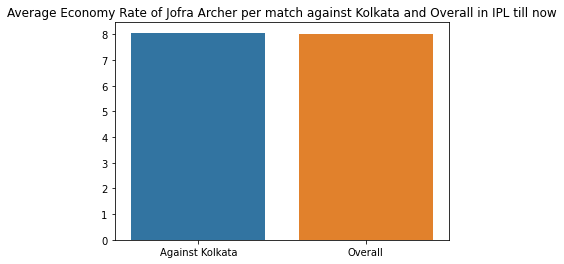

In [57]:
economy_Archer = pd.Series([np.mean(economy_rate_list),np.mean(economy_rate_list_overall)],index = ['Against Kolkata', 'Overall'])
sns.barplot(x = economy_Archer.index , y = economy_Archer)
plt.title('Average Economy Rate of Jofra Archer per match against Kolkata and Overall in IPL till now')
plt.show()

**Jofra Archer's economy rate is more/less 8 against Kolkata or in overall IPL.**

## How many bowlers from both teams, will have economy rate less than 8:

In [58]:
economy_dict = {}
bowlers = ['R Tewatia', 'JD Unadkat', 'S Gopal', 'BA Stokes', 'J Archer', 'O Thomas', 'R Parag', 'VR Aaron', 'SP Narine', 'AD Russell', 'Kuldeep Yadav', 'S Mavi', 'N Rana', 'P Krishna']
for j in bowlers:
    economy_rate_list = []
    for k in ids:
        runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['total_runs'])
        bye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['bye_runs'])
        legbye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['legbye_runs'])
        wide_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['wide_runs'])
        noball_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        for i in range(0,len(runs)):
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 0
        if economy_rate > 0:
            economy_rate_list.append(economy_rate)
    if len(economy_rate_list) != 0:
        economy_dict[j] = economy_rate_list
for k,v in economy_dict.items():
    economy_dict[k] = np.mean(v)
economy_dict

{'R Tewatia': 9.0,
 'JD Unadkat': 10.95,
 'S Gopal': 9.041666666666666,
 'BA Stokes': 6.458333333333333,
 'J Archer': 8.0625,
 'O Thomas': 8.75,
 'VR Aaron': 6.0,
 'SP Narine': 7.459090909090909,
 'AD Russell': 7.866666666666665,
 'Kuldeep Yadav': 5.9375,
 'S Mavi': 10.875,
 'N Rana': 5.5,
 'P Krishna': 9.8}

These are the bowlers with their economy rates in Kolkata vs Rajasthan match.

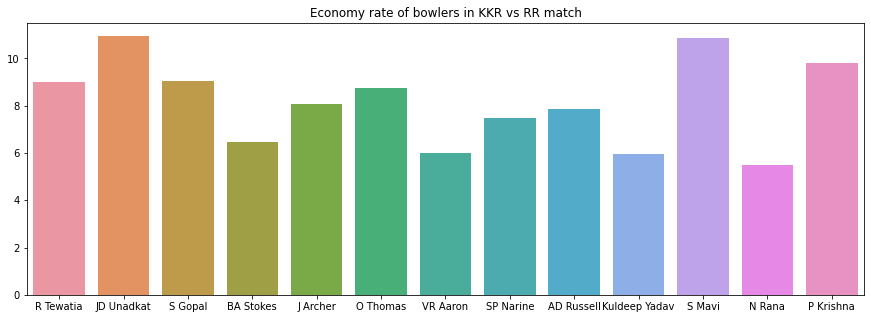

In [59]:
economy = pd.Series(list(economy_dict.values()),index = list(economy_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = economy.index, y = economy,ax=ax)
plt.title('Economy rate of bowlers in KKR vs RR match')
plt.show()

**Only 5 bowlers have average economy rate less than 8 in Kolkata vs Rajasthan match. But we cannot consider VR Aaron and N Rana beacuse they bowled only in one match. Other bowlers are SP Narine, AD Russel and BA Stokes.**

In [60]:
economy_dict_overall = {}
bowlers_overall = ['R Tewatia', 'JD Unadkat', 'S Gopal', 'BA Stokes', 'J Archer', 'O Thomas', 'R Parag', 'VR Aaron', 'T Curran', 'AS Rajpoot', 'M Markande', 'AJ Tye', 'SP Narine', 'AD Russell', 'Kuldeep Yadav', 'S Mavi', 'N Rana', 'P Krishna', 'L Ferguson', 'PJ Cummins', 'V Chakravarthy']
total_ids = list(df1[df1['bowler'].isin(bowlers_overall)]['match_id'].unique())
for j in bowlers_overall:
    economy_rate_list = []
    for k in total_ids:
        runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['total_runs'])
        bye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['bye_runs'])
        legbye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['legbye_runs'])
        wide_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['wide_runs'])
        noball_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        for i in range(0,len(runs)):
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 0
        if economy_rate > 0:
            economy_rate_list.append(economy_rate)
    if len(economy_rate_list) != 0:
        economy_dict_overall[j] = economy_rate_list
for k,v in economy_dict_overall.items():
    economy_dict_overall[k] = np.mean(v)
economy_dict_overall

{'R Tewatia': 7.546875,
 'JD Unadkat': 9.01833427442123,
 'S Gopal': 7.965430402930403,
 'BA Stokes': 8.729885057471263,
 'J Archer': 8.031203007518796,
 'O Thomas': 8.25,
 'R Parag': 8.208333333333332,
 'VR Aaron': 8.746776035842531,
 'T Curran': 11.291666666666666,
 'AS Rajpoot': 9.303854875283445,
 'M Markande': 8.979166666666666,
 'AJ Tye': 8.726666666666667,
 'SP Narine': 6.80746894341776,
 'AD Russell': 8.995623872982364,
 'Kuldeep Yadav': 8.664912280701754,
 'S Mavi': 9.927083333333334,
 'N Rana': 8.125,
 'P Krishna': 9.823710089399743,
 'L Ferguson': 11.733333333333334,
 'PJ Cummins': 8.29139254385965,
 'V Chakravarthy': 11.666666666666666}

These are the current bowlers of Kolkata and Rajasthan with their economy rates in overall IPL.

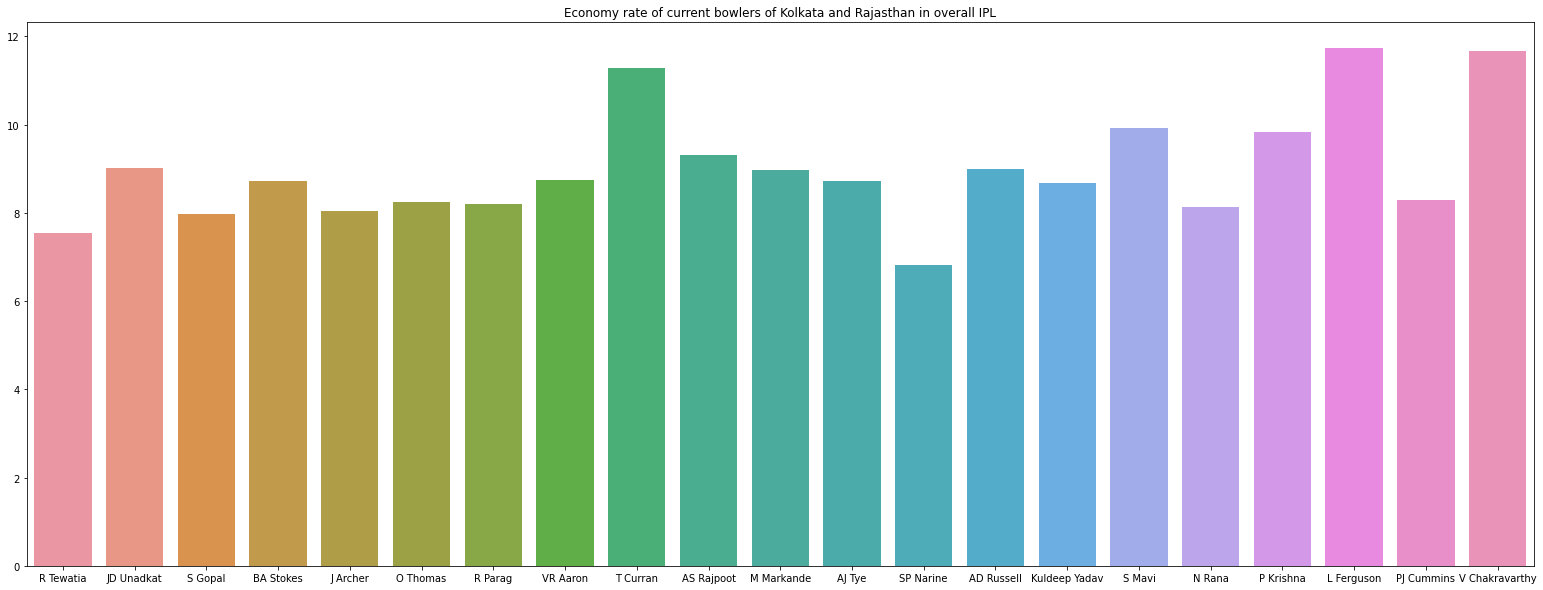

In [64]:
economy_overall = pd.Series(list(economy_dict_overall.values()),index = list(economy_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(27,10))
sns.barplot(x = economy_overall.index, y = economy_overall,ax=ax)
plt.title('Economy rate of current bowlers of Kolkata and Rajasthan in overall IPL')
plt.show()

**Only 3 bowlers have economy rates below 8 among Kolkata and Rajasthan bowlers in overall IPL. They are SP Narine, S Gopal and R Tewatia.**